<a href="https://colab.research.google.com/github/flaakira/Kaggle/blob/master/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Data

In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('train.csv')

In [0]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Start machine learning - Train_test

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [0]:
variable = ['LotArea', 'YearBuilt', 'YearRemodAdd']

In [0]:
x = train[variable]
y = train['SalePrice']

In [8]:
x.head()

,LotArea,YearBuilt,YearRemodAdd
0,8450,2003,2003
1,9600,1976,1976
2,11250,2001,2002
3,9550,1915,1970
4,14260,2000,2000


In [0]:
np.random.seed(0)
x_train, x_valid, y_train, y_valid =  train_test_split(x,y, test_size=0.5)

In [10]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((730, 3), (730, 3), (730,), (730,))

In [0]:
x = x.fillna(-1)

In [0]:
x_prev = test[variable]
x_prev = x_prev.fillna(-1)

In [0]:
x_train = x_train.fillna(-1)
y_train = y_train.fillna(-1)

In [14]:
model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
x_valid = x_valid.fillna(-1)

In [0]:
p = model.predict(x_valid)

In [17]:
np.mean(y_valid == p)

0.010958904109589041

In [18]:
x_prev.head()

,LotArea,YearBuilt,YearRemodAdd
0,11622,1961,1961
1,14267,1958,1958
2,13830,1997,1998
3,9978,1998,1998
4,5005,1992,1992


In [0]:
p =   model.predict(x_prev)

In [20]:
p

array([163000, 172500, 177000, ..., 180000, 220000, 236000])

#Cross Validation

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [22]:
result =[]
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for line_train, line_valid in kf.split(x):
  print("Train:", line_train.shape[0])
  print("Test:", line_valid.shape[0])
  print()

  x_train, x_valid = x.iloc[line_train], x.iloc[line_valid]
  y_train, y_valid = y.iloc[line_train], y.iloc[line_valid]
  #print(x_train.head)
  #print()

  model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
  model.fit(x_train, y_train)

  p= model.predict(x_valid)
  acc=np.mean(y_valid ==p)
  result.append(acc)
  print("Acc:", acc)
  print()

Train: 730
Test: 730

Acc: 0.00410958904109589

Train: 730
Test: 730

Acc: 0.005479452054794521

Train: 730
Test: 730

Acc: 0.0013698630136986301

Train: 730
Test: 730

Acc: 0.005479452054794521

Train: 730
Test: 730

Acc: 0.0027397260273972603

Train: 730
Test: 730

Acc: 0.0027397260273972603

Train: 730
Test: 730

Acc: 0.009589041095890411

Train: 730
Test: 730

Acc: 0.00410958904109589

Train: 730
Test: 730

Acc: 0.00410958904109589

Train: 730
Test: 730

Acc: 0.00684931506849315

Train: 730
Test: 730

Acc: 0.0027397260273972603

Train: 730
Test: 730

Acc: 0.009589041095890411

Train: 730
Test: 730

Acc: 0.00410958904109589

Train: 730
Test: 730

Acc: 0.00684931506849315

Train: 730
Test: 730

Acc: 0.00684931506849315

Train: 730
Test: 730

Acc: 0.00684931506849315

Train: 730
Test: 730

Acc: 0.0027397260273972603

Train: 730
Test: 730

Acc: 0.00410958904109589

Train: 730
Test: 730

Acc: 0.00684931506849315

Train: 730
Test: 730

Acc: 0.0027397260273972603



In [23]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([1., 5., 0., 5., 0., 2., 5., 0., 0., 2.]),
 array([0.00136986, 0.00219178, 0.0030137 , 0.00383562, 0.00465753,
        0.00547945, 0.00630137, 0.00712329, 0.00794521, 0.00876712,
        0.00958904]),
 <a list of 10 Patch objects>)

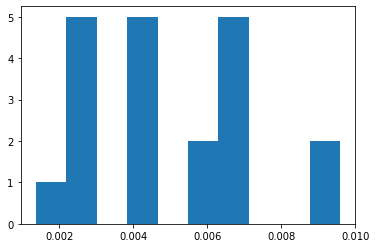

In [24]:

pylab.hist(result)

In [25]:
np.mean(result)

0.005

In [0]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
model.fit(x,y)
p=model.predict(test[variable].fillna(-1))

# Submission

In [32]:
sub = pd.Series(p, index=test['Id'], name = 'SalePrice')
sub.shape

(1459,)

In [0]:
sub.to_csv("house_prices.csv")

In [34]:
!head -n10 titanic_machinelearn.csv

head: cannot open 'titanic_machinelearn.csv' for reading: No such file or directory
